In [25]:
import numpy as np
import pandas as pd 

In [26]:
df = pd.read_csv('train_and_test2.csv')
df.head(5)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [27]:
df.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [28]:

df = df.drop(columns=['zero', 'zero.1', 'zero.2', 'zero.3', 'zero.4', 
                      'zero.5', 'zero.6', 'zero.7', 'zero.8', 'zero.9', 'zero.10', 'zero.11',
                          'zero.12', 'zero.13', 'zero.14', 'zero.15', 
                          'zero.16', 'zero.17', 'zero.18'])

df

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0
...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,3,2.0,0
1305,1306,39.0,108.9000,1,0,0,1,0.0,0
1306,1307,38.5,7.2500,0,0,0,3,2.0,0
1307,1308,28.0,8.0500,0,0,0,3,2.0,0


In [29]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       2
2urvived       0
dtype: int64


In [30]:
# Fill missing categorical columns with their mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [31]:


# Convert 'Embarked' column to numerical using one-hot encoding
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)
df.drop('Embarked', axis=1, inplace=True)


In [32]:
df

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,2urvived,Embarked_0.0,Embarked_1.0,Embarked_2.0
0,1,22.0,7.2500,0,1,0,3,0,False,False,True
1,2,38.0,71.2833,1,1,0,1,1,True,False,False
2,3,26.0,7.9250,1,0,0,3,1,False,False,True
3,4,35.0,53.1000,1,1,0,1,1,False,False,True
4,5,35.0,8.0500,0,0,0,3,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,3,0,False,False,True
1305,1306,39.0,108.9000,1,0,0,1,0,True,False,False
1306,1307,38.5,7.2500,0,0,0,3,0,False,False,True
1307,1308,28.0,8.0500,0,0,0,3,0,False,False,True


In [33]:
# Define the feature set (X) and target variable (y)
X = df.drop(columns=['Passengerid', '2urvived'])
y = df['2urvived']


In [35]:
y

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: 2urvived, Length: 1309, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)



C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.77


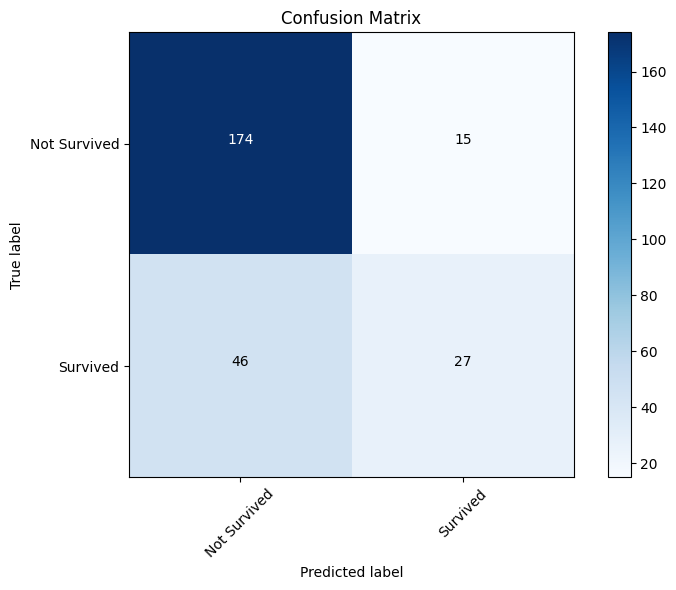

In [46]:
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(set(y)))
plt.xticks(tick_marks, labels=['Not Survived', 'Survived'], rotation=45)
plt.yticks(tick_marks, labels=['Not Survived', 'Survived'])

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], horizontalalignment='center',
                 color='white' if conf_matrix[i, j] > conf_matrix.max() / 2. else 'black')

plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()



In [47]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)




Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       189
           1       0.64      0.37      0.47        73

    accuracy                           0.77       262
   macro avg       0.72      0.65      0.66       262
weighted avg       0.75      0.77      0.74       262



In [49]:
# Example prediction
example_data = X_test.iloc[12].values.reshape(1, -1)  # Take the first sample from the test set
example_prediction = model.predict(example_data)
print(f"Prediction for example data (0 = Not Survived, 1 = Survived): {example_prediction[0]}")

Prediction for example data (0 = Not Survived, 1 = Survived): 0


C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
